# Players dataset generation

For more info, see here: https://docs.google.com/spreadsheets/d/1JEBWhN82CrcQeL7t1mdIukNd1iHnlYaYLJAVS8s8paQ/edit#gid=0

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy.stats import norm, poisson
import seaborn as sns


# High-resolution please
%config InlineBackend.figure_format = 'retina'

In [2]:
n = 12  # number of observations

columns = [
    "name",     # str
    "country",  # categorical (country code)
    "age",      # int
    "ezlvl",    # categorical (1 or 0)
    "time",     # float
    "points",   # int
    "finished",	# categorical (1 or 0)
]

# latent variable
#   "jobstatus" # categorical (1=employed or 0=unemployed)

In [3]:
usernames = [
    "mary",
    "jane",
    "emil",
    "ivan",
    "hasan",
    "jordan",
    "sanjay",
    "lena",
    "shuo",
    "r0byn",
    "anna",
    "joro",
]


In [4]:
# categorical (country code)
#           ['mary', 'jane', 'emil', 'ivan', 'hasan', 'jordan', 'sanjay', 'lena', 'shuo', 'r0bin', 'anna', 'joro' ]
countries = ["us",  "ca",    "fr",   "ca",   "tr",    "us",     "ca",     "uk",   "cn",   "us",    "pl",   "bg"   ]
countries

['us', 'ca', 'fr', 'ca', 'tr', 'us', 'ca', 'uk', 'cn', 'us', 'pl', 'bg']

(np.float64(33.75),
 [38,
  np.int64(21),
  52,
  50,
  np.int64(26),
  45,
  np.int64(27),
  np.int64(23),
  24,
  59,
  np.int64(18),
  np.int64(22)],
 np.int64(18))

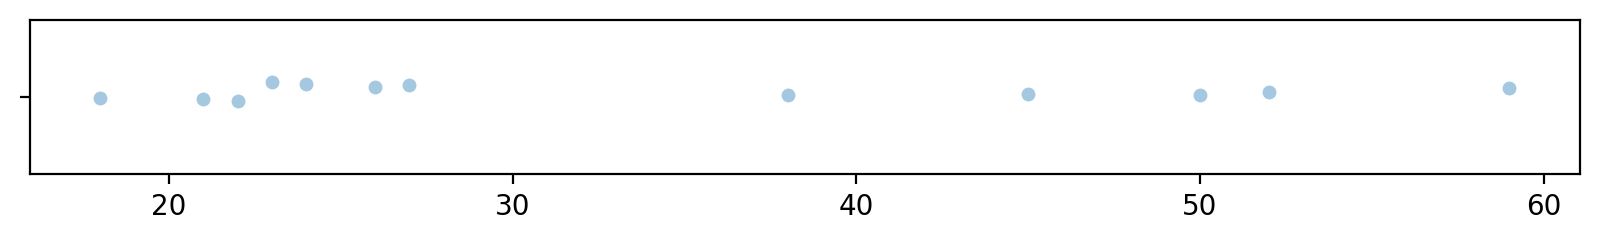

In [5]:
seed = 48
random.seed(seed)
np.random.seed(seed)

def gen_age():
    r = random.randint(0,2)
    if r == 0:
        age = poisson(mu=10, loc=13).rvs(1)[0]
    else:
        age = random.randint(18,60)
    return age

ages = [gen_age() for i in range(0,n)]
with plt.rc_context({"figure.figsize":(10,1)}):
    sns.stripplot(x=ages, jitter=0.1, alpha=0.4)
np.mean(ages), ages, min(ages)

In [6]:
ezlvls = [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
ezlvls, sum(ezlvls)/len(ezlvls)

([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1], 0.5)

In [7]:
for i, age in enumerate(ages):
    print(str(i)+"-"+str(age), end=", ")

0-38, 1-21, 2-52, 3-50, 4-26, 5-45, 6-27, 7-23, 8-24, 9-59, 10-18, 11-22, 

In [8]:
# i-age        0-38, 1-21, 2-52, 3-50, 4-26, 5-45, 6-27, 7-23, 8-24, 9-59, 10-18, 11-22 
jobstatuses = [1,    1,    1,    1,    0,    1,    0,    0,    1,    1,    0,     0     ]
jobstatuses, sum(jobstatuses)/len(jobstatuses)

([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0], 0.5833333333333334)

(np.float64(249.75637512294534),
 [np.float64(124.93852827441272),
  np.float64(331.63573247118194),
  np.float64(324.61400286434304),
  np.float64(39.508425874140556),
  np.float64(253.1856321020095),
  np.float64(28.492954202663157),
  350,
  np.float64(408.75879762658036),
  np.float64(194.7677803575266),
  np.float64(255.54716366546495),
  np.float64(303.6596305850437),
  np.float64(381.9678534519779)],
 np.float64(28.492954202663157),
 np.float64(28.492954202663157))

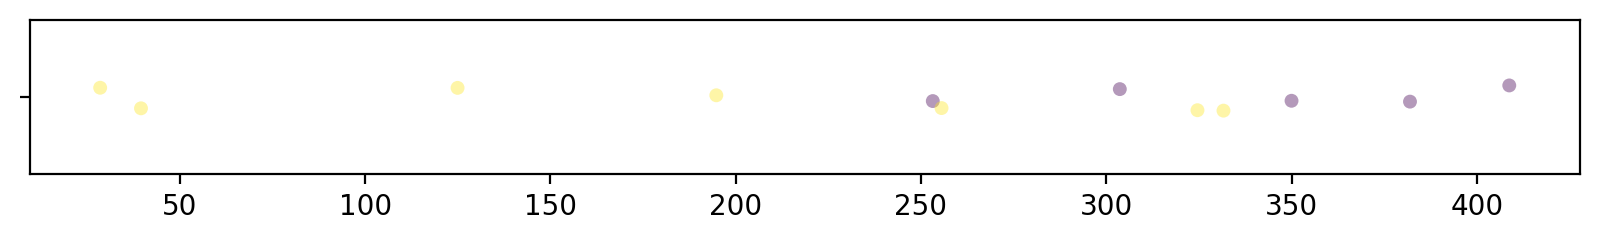

In [9]:
def get_time(age, jobstatus):
    if jobstatus == 1:
        time = norm(loc=200, scale=100).rvs(1)[0]
    else:
        time = norm(loc=400, scale=100).rvs(1)[0]
    return time

np.random.seed(44)
times = [get_time(age, jobstatus) for age, jobstatus in zip(ages, jobstatuses)]

# manual override for one data point
times[6] = 350

with plt.rc_context({"figure.figsize":(10,1)}):
    sns.stripplot(x=times, c=jobstatuses, jitter=0.1, alpha=0.4)
np.mean(times), times, min(times), min(times)

In [10]:
# # times in hours (to check if reasonable)
# times_h = [t_min/60 for t_min in times]
# times_h

([418, 1149, 1321, 226, 815, 206, 1401, 1745, 1043, 1102, 1209, 1491],
 np.int64(206),
 np.int64(1745))

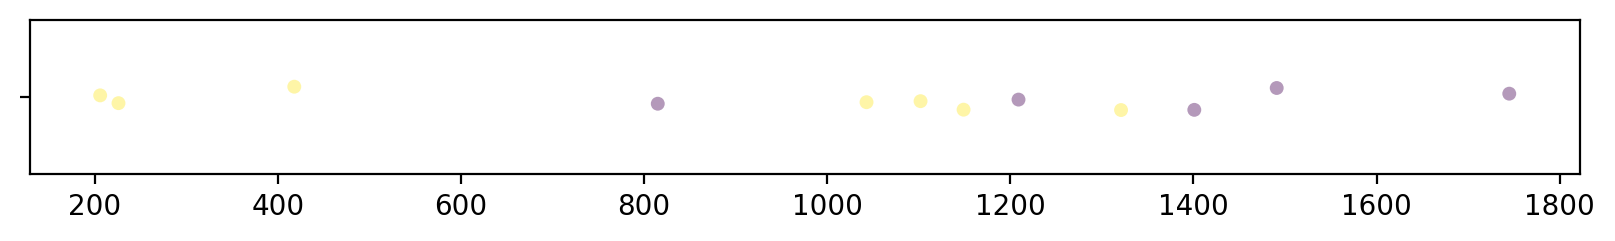

In [11]:
avg_pts_per_min = 4

np.random.seed(50)
def gen_points(time):
    boost = norm(0,50).rvs(1)[0]
    noise = norm(0,100).rvs(1)[0]
    points = avg_pts_per_min * time + boost + noise
    return int(points)

points = [gen_points(time) for time in times]


with plt.rc_context({"figure.figsize":(10,1)}):
    sns.stripplot(x=points, c=jobstatuses, jitter=0.1, alpha=0.4)

points, np.min(points), np.max(points)

In [12]:
#  -times    124.94,331.64, 324.61, 39.51, 253.19, 28.49, 585.88, 408.76, 194.77, 255.55, 303.66,  381.97
# i-pts      0-418  1-1149, 2-1321, 3-226, 4-815,  5-206, 6-2344, 7-1745, 8-1043, 9-1102, 10=1209, 11-1491
finisheds = [0,    1,      1,      0,     0,      0,     1,      1,      0,      0,      1,        1]
finisheds, sum(finisheds)/len(finisheds)

([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1], 0.5)

## Data tests

In [13]:
players_dict = {
    "username": usernames,
    "country": countries,
    "jobstatus": jobstatuses,
    "age":ages,
    "ezlvl":ezlvls,
    "time":[round(time,2) for time in times],
    "points":points,
    "finished":finisheds
}
for value in players_dict.values():
    assert len(value) == n

## Create full data frame

In [14]:
players_full = pd.DataFrame(players_dict)
players_full

,username,country,jobstatus,age,ezlvl,time,points,finished
0,mary,us,1,38,0,124.94,418,0
1,jane,ca,1,21,0,331.64,1149,1
2,emil,fr,1,52,1,324.61,1321,1
3,ivan,ca,1,50,1,39.51,226,0
4,hasan,tr,0,26,1,253.19,815,0
5,jordan,us,1,45,0,28.49,206,0
6,sanjay,ca,0,27,1,350.00,1401,1
7,lena,uk,0,23,0,408.76,1745,1
8,shuo,cn,1,24,1,194.77,1043,0
9,r0byn,us,1,59,0,255.55,1102,0


## Create players data frame

In [15]:
players = players_full.drop(columns=["jobstatus"])
players

,username,country,age,ezlvl,time,points,finished
0,mary,us,38,0,124.94,418,0
1,jane,ca,21,0,331.64,1149,1
2,emil,fr,52,1,324.61,1321,1
3,ivan,ca,50,1,39.51,226,0
4,hasan,tr,26,1,253.19,815,0
5,jordan,us,45,0,28.49,206,0
6,sanjay,ca,27,1,350.00,1401,1
7,lena,uk,23,0,408.76,1745,1
8,shuo,cn,24,1,194.77,1043,0
9,r0byn,us,59,0,255.55,1102,0


In [16]:
# for copy-pasting into LaTeX
print(players.to_latex())

\begin{tabular}{lllrrrrr}
\toprule
 & username & country & age & ezlvl & time & points & finished \\
\midrule
0 & mary & us & 38 & 0 & 124.940000 & 418 & 0 \\
1 & jane & ca & 21 & 0 & 331.640000 & 1149 & 1 \\
2 & emil & fr & 52 & 1 & 324.610000 & 1321 & 1 \\
3 & ivan & ca & 50 & 1 & 39.510000 & 226 & 0 \\
4 & hasan & tr & 26 & 1 & 253.190000 & 815 & 0 \\
5 & jordan & us & 45 & 0 & 28.490000 & 206 & 0 \\
6 & sanjay & ca & 27 & 1 & 350.000000 & 1401 & 1 \\
7 & lena & uk & 23 & 0 & 408.760000 & 1745 & 1 \\
8 & shuo & cn & 24 & 1 & 194.770000 & 1043 & 0 \\
9 & r0byn & us & 59 & 0 & 255.550000 & 1102 & 0 \\
10 & anna & pl & 18 & 0 & 303.660000 & 1209 & 1 \\
11 & joro & bg & 22 & 1 & 381.970000 & 1491 & 1 \\
\bottomrule
\end{tabular}



## Save data files

In [17]:
# used in Sec 1.1 and first half of Sec 1.2
players.to_csv("../datasets/players.csv", index=False)

# used in Sec 1.1 to show controlling for a confounding variable
players_full.to_csv("../datasets/players_full.csv", index=False)

In [18]:
# for copy pasting into gsheet
# https://docs.google.com/spreadsheets/d/1JEBWhN82CrcQeL7t1mdIukNd1iHnlYaYLJAVS8s8paQ/edit#gid=182671088
# players.to_csv("../datasets/players.tsv", sep="\t")

## Preliminary analysis

### Use case 1
In Sec 1.1	use `time ~ ezlvl` to discuss experiment on improvements in retention


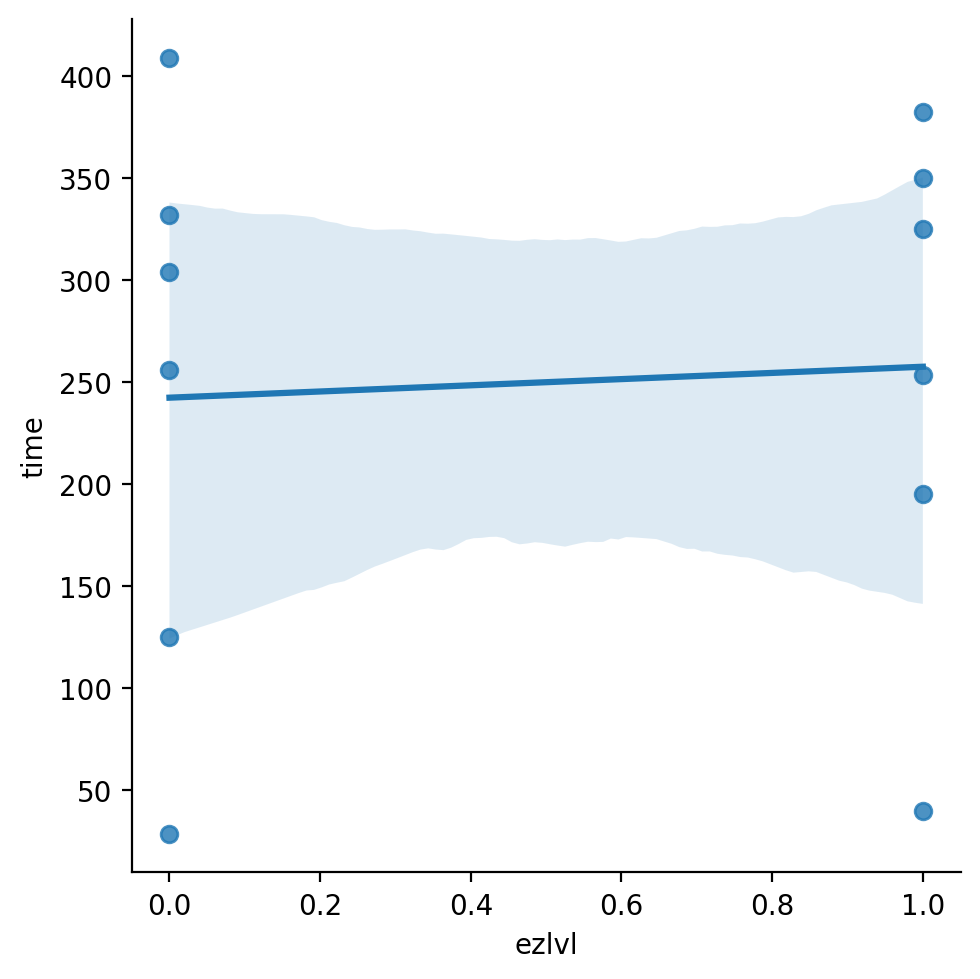

In [19]:
sns.lmplot(x="ezlvl", y="time", data=players)

### Use case 2
In Sec 1.1 use `time ~ age` to look for correlation between age and engagement.

In [20]:
import statsmodels.formula.api as smf
lm = smf.ols("time ~ 1 + age", data=players).fit()
lm.params

Intercept    403.853112
age           -4.565796
dtype: float64

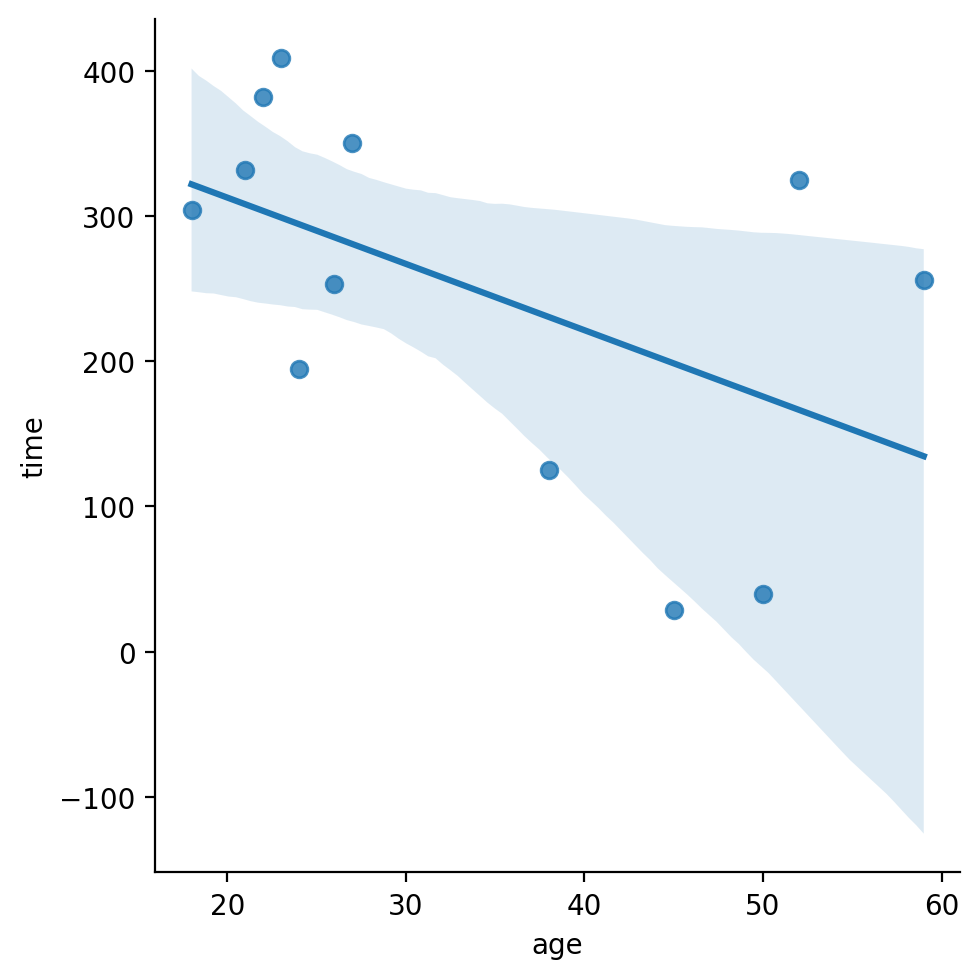

In [21]:
sns.lmplot(x="age", y="time", data=players)

#### Use case 3	

In Sec 1.1	`jobstatus` (non-existent)	explain possible confounding of `time~age` correlation by confounder var. "employed" no time to play game vs. "unemployed" has time to play game, with young ppl being more likely to be unemployed

In [22]:
lm_full = smf.ols("time ~ 1 + age + jobstatus", data=players_full).fit()
lm_full.params

Intercept    377.817172
age           -1.650913
jobstatus   -124.013781
dtype: float64

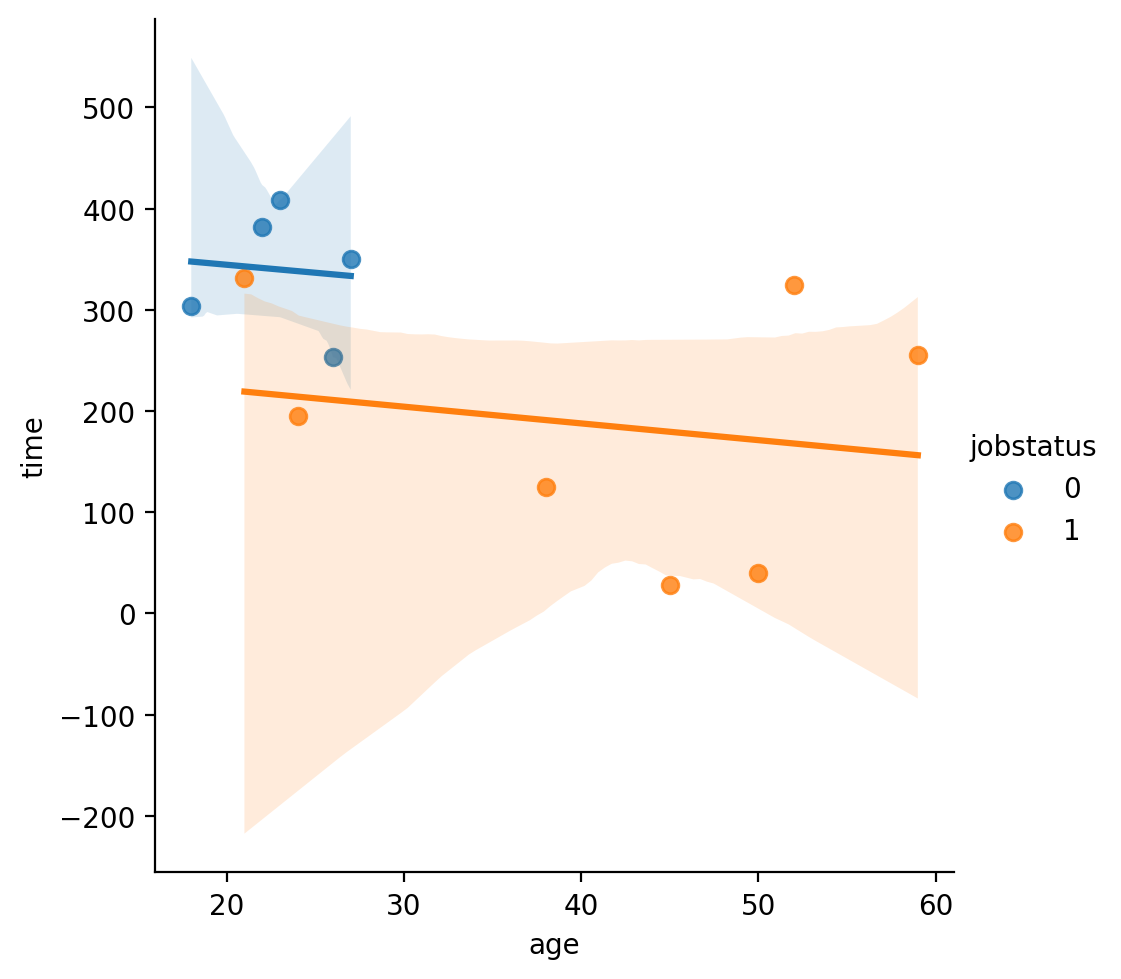

In [23]:
sns.lmplot(x="age", y="time", hue="jobstatus", data=players_full)

### Check if data frame is balanced

Did the `ezlvl` random assignment give us two comparable groups?

In [24]:
players_full.groupby("ezlvl")[["jobstatus","time","age","points","finished"]].describe().T

ezlvl                      0            1
jobstatus count     6.000000     6.000000
          mean      0.666667     0.500000
          std       0.516398     0.547723
          min       0.000000     0.000000
          25%       0.250000     0.000000
          50%       1.000000     0.500000
          75%       1.000000     1.000000
          max       1.000000     1.000000
time      count     6.000000     6.000000
          mean    242.173333   257.341667
          std     140.797137   126.511582
          min      28.490000    39.510000
          25%     157.592500   209.375000
          50%     279.605000   288.900000
          75%     324.645000   343.652500
          max     408.760000   381.970000
age       count     6.000000     6.000000
          mean     34.000000    33.500000
          std      16.174053    13.678450
          min      18.000000    22.000000
          25%      21.500000    24.500000
          50%      30.500000    26.500000
          75%      43.250000    44.250000
          max      59.000000    52.000000
points    count     6.000000     6.000000
          mean    971.500000  1049.500000
          std     564.906629   474.419962
          min     206.000000   226.000000
          25%     589.000000   872.000000
          50%    1125.500000  1182.000000
          75%    1194.000000  1381.000000
          max    1745.000000  1491.000000
finished  count     6.000000     6.000000
          mean      0.500000     0.500000
          std       0.547723     0.547723
          min       0.000000     0.000000
          25%       0.000000     0.000000
          50%       0.500000     0.500000
          75%       1.000000     1.000000
          max       1.000000     1.000000